In [11]:
import torch.nn as nn
from torchvision import models
import numpy as np
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
import cv2
import torch
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset, TensorDataset

In [ ]:
from ex import *

In [17]:
test_size = 0.3
val_size = 0.3

In [18]:
data = datasets.load_wine()
x_train, x_test, y_train, y_test \
        = train_test_split(data.data, data.target, test_size=test_size, random_state=1)

In [19]:
x_train, x_val, y_train, y_val \
        = train_test_split(x_train, y_train, test_size=val_size, random_state=1)

In [23]:
device="cpu"
batch_size = 50
kwargs = {} if device=='cpu' else {'num_workers': 2, 'pin_memory': True}
loader_kwargs = {'batch_size':batch_size, **kwargs}

In [25]:
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                            std=[0.229, 0.224, 0.225])
    ])

In [27]:
# Build Dataset
train_data = CustomTensorDataset(data=(x_train, y_train), transform=transform)
val_data   = CustomTensorDataset(data=(x_val, y_val), transform=transform)
test_data  = CustomTensorDataset(data=(x_test, y_test), transform=transform)

In [43]:
train_loader = DataLoader(train_data, shuffle=False, **loader_kwargs)
val_loader   = DataLoader(val_data, shuffle=True, **loader_kwargs)
test_loader  = DataLoader(test_data, shuffle=False, **loader_kwargs)

In [44]:
x , y = next(iter(train_loader))

In [62]:
y

tensor([2, 0, 1, 0, 1, 2, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 1, 2, 2, 1, 1, 2, 2, 1,
        0, 1, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 0, 1, 2, 0, 2, 1, 0,
        1, 0])

In [45]:
x.shape

torch.Size([50, 3, 256, 256])

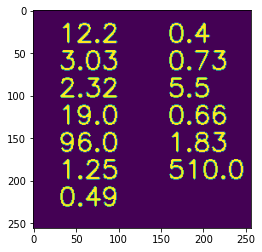

In [46]:
plt.imshow(x[0,1,:])

In [50]:
x_train[0,:]

array([1.22e+01, 3.03e+00, 2.32e+00, 1.90e+01, 9.60e+01, 1.25e+00,
       4.90e-01, 4.00e-01, 7.30e-01, 5.50e+00, 6.60e-01, 1.83e+00,
       5.10e+02])

In [ ]:
model = load_model("densenet121")    

In [54]:
opt='Adagrad'

In [55]:
optimizer = opt_selection(model, opt)

In [56]:
criterion = nn.CrossEntropyLoss()

In [57]:
best_train, best_val = 0.0, 0.0
epochs = 100

In [60]:
for epoch in range(1, epochs+1):
    # Train and Validate
    train_stats = train_step(model, criterion, optimizer, train_loader)
    valid_stats = valid_step(model, criterion, val_loader)
    print(train_stats)
    print(valid_stats)
    # Keep best model
    if valid_stats['accuracy'] > best_val or (valid_stats['accuracy']==best_val and train_stats['accuracy']>=best_train):
        best_train  = train_stats['accuracy']
        best_val    = valid_stats['accuracy']
        best_model_weights = copy.deepcopy(model.state_dict())

# Load best model and evaluate on test set
model.load_state_dict(best_model_weights)
test_stats = valid_step(model, criterion, test_loader)

print('\nBests Model Accuracies: Train: {:4.2f} | Val: {:4.2f} | Test: {:4.2f}'.format(best_train, best_val, test_stats['accuracy']))

{'loss': 0.002120048739016056, 'accuracy': 1.0}
{'loss': 0.2642446458339691, 'accuracy': 0.8947368421052632}
{'loss': 0.002028312301263213, 'accuracy': 1.0}
{'loss': 0.24457745254039764, 'accuracy': 0.9210526315789473}
{'loss': 0.0019443939090706408, 'accuracy': 1.0}
{'loss': 0.22760240733623505, 'accuracy': 0.9473684210526315}
{'loss': 0.0018672490841709077, 'accuracy': 1.0}
{'loss': 0.21263277530670166, 'accuracy': 0.9473684210526315}
{'loss': 0.0017960796831175685, 'accuracy': 1.0}
{'loss': 0.1989196538925171, 'accuracy': 0.9473684210526315}
{'loss': 0.001730342861264944, 'accuracy': 1.0}
{'loss': 0.19005504250526428, 'accuracy': 0.9473684210526315}
{'loss': 0.0016693885554559529, 'accuracy': 1.0}
{'loss': 0.18333034217357635, 'accuracy': 0.9473684210526315}
{'loss': 0.0016126082045957446, 'accuracy': 1.0}
{'loss': 0.17839667201042175, 'accuracy': 0.9473684210526315}
{'loss': 0.0015595688601024449, 'accuracy': 1.0}
{'loss': 0.17522740364074707, 'accuracy': 0.9473684210526315}
{'loss

KeyboardInterrupt: 